# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  60 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  30 баллов
* Задача 4 &mdash;  30 баллов







-----

In [1]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

from IPython.display import clear_output

from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---
## <b><font color="blue">Легкая часть</font></b>
### Задача 1

#### *Профиль биология*

Мы будем исследовать датасет по экспрессиям различных генов (RNA-seq), используемых для предсказания возраста пациентов.

In [3]:
df = pd.read_csv("hw5_data/Rnaseq_age_reg.csv")
# df.head()

Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец `Age`, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

**Переходите к общей части.**

#### *Профиль физика*

In [4]:
df = pd.read_csv("hw5_data/physics_data.csv", index_col=0)
df.head(5000)

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-92.990624,-37.989869,-41.713767,2.459257,-18.563966,12.633696,10.269036,7.093498,11.729846,-0.500295,...,-0.000781,-0.002851,-0.006694,-0.001080,0.003278,0.011115,0.005822,0.005368,27535,-9.593441
496,-33.853515,35.368724,13.274417,25.765836,16.590896,-13.918333,16.788150,-14.716585,3.238425,-12.302618,...,-0.003979,0.009309,0.003323,-0.009299,0.000988,-0.010954,-0.003540,-0.001859,27536,-11.076878
497,-38.655242,11.967915,-12.953299,12.041033,26.324118,4.377067,-5.507208,-15.101374,-4.403972,13.578827,...,-0.008269,-0.003215,0.005450,0.003140,-0.000292,0.001727,0.014564,0.009907,27538,-9.005514
498,-46.056230,18.084091,39.077455,-14.063225,0.243868,-21.583486,8.959267,17.277933,-3.917826,-0.851561,...,0.013263,-0.013744,-0.013583,-0.012581,0.009365,0.000493,0.003530,0.002471,27541,-14.458023


Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец Eat, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

In [5]:
X = np.hstack([df.drop("Eat", axis=1)])
y = df["Eat"]

X_train, X_test = train_test_split(X, test_size=0.7, train_size=0.3, random_state=207)
y_train, y_test = train_test_split(y, test_size=0.7, train_size=0.3, random_state=207)

### Общая часть

Отмасштабируйте данные:

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучите модель линейной регрессии и посмотрите на значения метрик на тесте. Что вы можете сказать про результат обучения?

In [7]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

print("r2_score = ", r2_score(y_test, y_pred), "\n",
      "RMSE = ", mean_squared_error(y_test, y_pred) , "\n",
      "MAE = ", mean_absolute_error(y_test, y_pred), "\n",
      "MAPE = ", mean_absolute_percentage_error(y_test, y_pred) * 100 , '\n')  # % 

r2_score =  0.40706865389598357 
 RMSE =  7.221429547888227 
 MAE =  1.7440050194643546 
 MAPE =  18.44595581363626 



r2_score показал достаточно низкое значение. Постараемся его повысить далее

Обучите линейные модели с регуляризациями, которые мы проходили ранее. Для каждой из моделей постройте графики зависимости метрик r2 и MAPE от коэфициента регуляризации. Можно пользоваться кодом из домашнего задания по регуляризации. Сильно ли улучшился результат? 

In [8]:
def calculate_coef(model, X, y, log_min, log_max, 
               num):
    """
    Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации.

    :param model: регрессионная модель
    :param X: матрица регрессоров
    :param y: вектор целевой переменной
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона

    :return coefs: коэффициенты модели
    """
    
    alphas = np.logspace(log_min, log_max, num) # сетка параметров   
    coefs = [] # коэффициенты моделей
    for a in alphas:
        if 'l1_ratio' in model.get_params(): # для ElasticNet
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a) # переопределяем параметры модели
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20]) 
    return coefs

def draw_track(coefs, log_min, log_max, 
               num, title='', figsize=(10, 5)):
    
    """
    Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param coefs: коэффициенты модели
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона
    :param title: название графика
    :param figsize: размеры рисунка

    :return coefs: коэффициенты модели
    """
    alphas = np.logspace(log_min, log_max, num) # сетка параметров  

    plt.figure(figsize=figsize)
    ax = plt.gca() # используется для получения текущего экземпляра axes
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label) # рисуем коэффициенты в зависимости от alpha
        ind += 1
        
    ax.set_xscale('log') # логарифмическая шкала
    ax.set_xlim(ax.get_xlim()[::-1])  # обратить ось
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

In [9]:
def draw_errors(error, error_name, alphas, X_train, y_train, X_test, y_test):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    :param error: функция, вычисляющая ошибку
    :param error_name: имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    :param alphas: массив величин alpha
    """
    arr = [] # массив ошибок
    for a in alphas:
        tmp = [] # массив ошибок
        models = []
        for alpha in alphas:
            models.append(Ridge(alpha=a))
            models.append(Lasso(alpha=a))
            for r1 in [0.1, 0.5, 0.9]:
                models.append(ElasticNet(alpha=a, l1_ratio=r1))
        for model in models:
            # обучение модели и предсказание
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            tmp.append(error(y_test, y_pred))
        arr.append(tmp)

    arr = np.array(arr)
    plt.figure(figsize=(10, 6), dpi=100)

    names = ["RIDGE", "LASSO", "ELASTIC(r1_ratio=0.1)", "ELASTIC(r1_ratio=0.5)", "ELASTIC(r1_ratio=0.9)"]
    for i in range(5):
        plt.plot(alphas, arr[:, i], label=names[i]) # рисуем ошибки в зависимости от alpha


    linreg = {}

    linreg_model = LinearRegression()
    linreg_model.fit(X_train, y_train)
    y_pred = linreg_model.predict(X_test)

    linreg[error_name] = error(y_true=y_test, y_pred=y_pred)

    # прерывистой линией рисуем ошибки логрега без регуляризации
    plt.hlines(linreg[error_name], alphas[0], alphas[-1], color='black', label = 'No regularization', linestyles='dashed')
    plt.xlabel('Параметр регуляризации')
    plt.ylabel(error_name)
    plt.xscale('log')
    plt.legend()

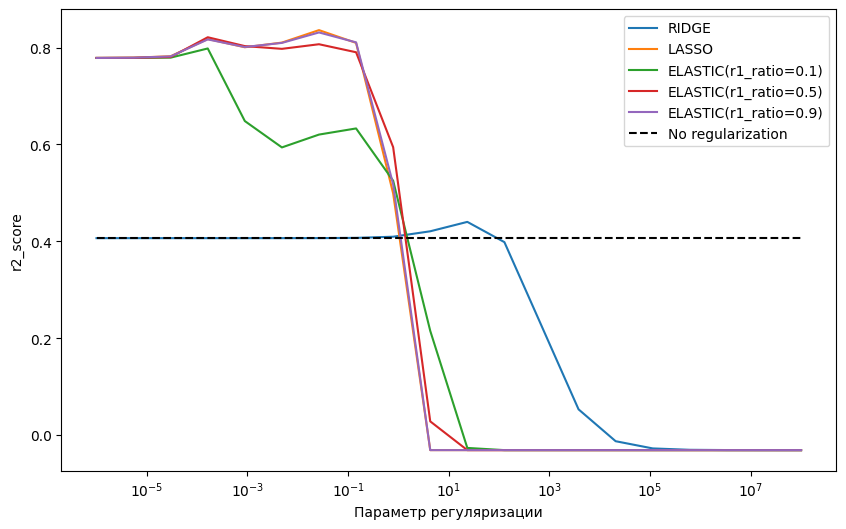

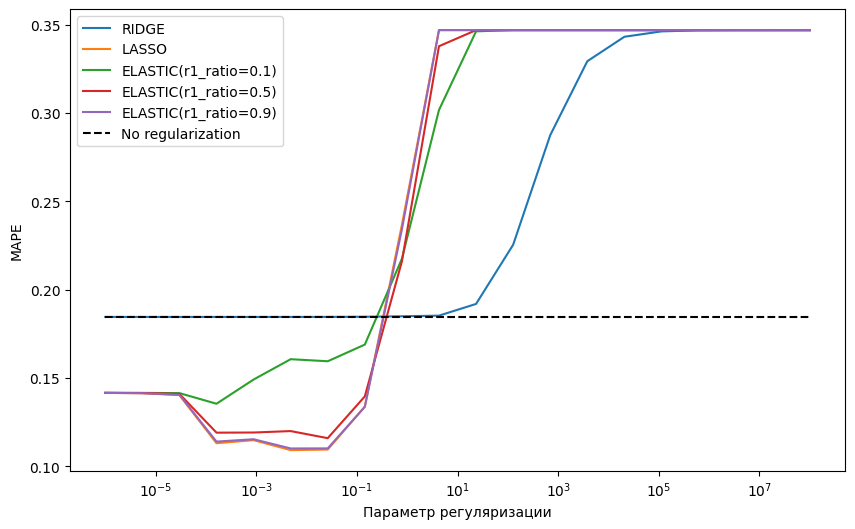

In [10]:
alphas = np.logspace(-6, 8, 20)

draw_errors(r2_score, "r2_score", alphas, X_train, y_train, X_test, y_test)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas, X_train, y_train, X_test, y_test)


Посмотрим поближе на диапазон, в котором r2_score максимальна, а MAPE минимальна

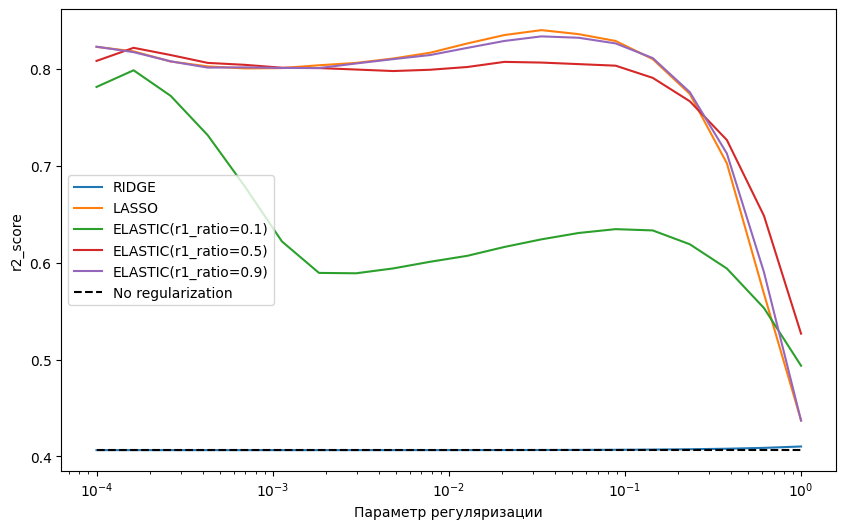

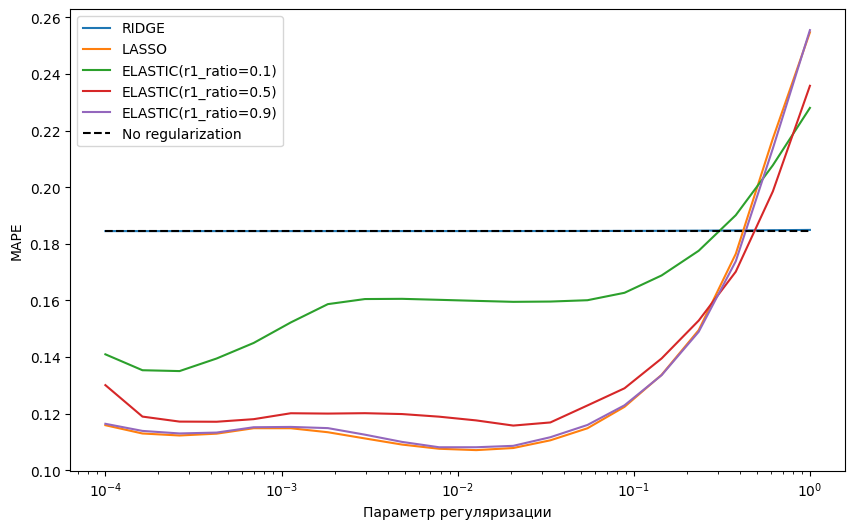

In [11]:
alphas = np.logspace(-4, 0, 20)

draw_errors(r2_score, "r2_score", alphas, X_train, y_train, X_test, y_test)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas, X_train, y_train, X_test, y_test)

Выберите оптимальный, на вашь взгляд, параметр для L1-регуляризации, обучите модель Lasso-регрессии, выведите ещё раз метрики r2 и MAPE и проведите отбор признаков: уберите из датасета все те, для которых коэффициент регуляризации оказался нулевым.

In [12]:
# Параметр регуляции = 0.16 - Lasso показало себя наилучшим образом

lasso_model = Lasso(alpha=0.16)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print("r2_score = ", r2_score(y_test, y_pred), "\n",
      "MAPE = ", mean_absolute_percentage_error(y_test, y_pred) * 100 , '\n')  # % 


r2_score =  0.8021636510541861 
 MAPE =  13.687117049125716 



In [13]:
print(lasso_model.sparse_coef_)

  (0, 1)	-1.1551610298851676
  (0, 2)	-1.9593203950122748
  (0, 3)	0.628113103657678
  (0, 4)	0.010632261474897008
  (0, 6)	0.18215519549083872
  (0, 21)	-0.8052126270182416
  (0, 22)	-0.07701635158257938
  (0, 24)	0.01892990250668845
  (0, 26)	-0.304374531045083
  (0, 27)	0.42692299847677423
  (0, 29)	-0.29413198816155844
  (0, 30)	0.0666107446083542
  (0, 34)	0.008081198970197387
  (0, 52)	-0.056868721088823314
  (0, 195)	-0.015338406872794893
  (0, 230)	0.022695356819566036
  (0, 237)	0.003165516382732321
  (0, 242)	-0.04710822225658107
  (0, 253)	0.21460574935502172
  (0, 266)	0.024017885325081503
  (0, 271)	-0.17946804611403752
  (0, 278)	0.017719424835427783
  (0, 285)	-0.17632266353306925


In [14]:
idx = ['1', '2', '3', '4', '6', '21', '22', '24', '26', '27', '29', '30','34','52','195','230','237','242', '253', '266', '271', '278', '285']
new_df = df[idx]
# new_df.isna().sum()
new_df.head(5000)

,1,2,3,4,6,21,22,24,26,27,...,52,195,230,237,242,253,266,271,278,285
0,-0.835719,45.240515,-22.585658,1.450320,12.376342,5.340506,4.969415,0.006403,2.757404,-4.199367,...,0.858496,0.091524,-0.022237,-0.059711,-0.041133,-0.131693,-0.033784,0.036059,-0.002446,-0.009772
1,24.930703,-7.485562,40.737762,21.400170,4.467203,-0.664091,-0.704199,-0.143260,0.759895,-1.871914,...,1.082967,0.037623,0.006825,-0.018006,-0.014838,0.008109,-0.009541,0.007244,-0.002811,-0.007571
2,-49.823448,-35.062080,1.698937,-18.012227,9.210336,1.058435,0.512906,-1.047310,0.174719,-0.553932,...,-0.276563,-0.026008,-0.014705,-0.003170,0.022468,0.008048,0.007464,0.003256,0.006237,-0.002011
3,19.211767,-4.858507,10.484105,16.622411,-14.876963,5.731974,2.426062,0.490418,0.651300,-2.345693,...,-0.510875,-0.024173,0.012493,-0.041638,0.020318,-0.015969,0.032869,0.015402,-0.003125,-0.016088
4,-23.951574,-55.340413,-7.879883,-16.304009,11.326496,0.944216,0.164863,-0.310109,-0.479923,0.770741,...,0.874432,-0.001021,0.001079,-0.011153,-0.006150,-0.003900,0.003707,0.002279,0.000423,0.001455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-37.989869,-41.713767,2.459257,-18.563966,10.269036,3.038211,1.550653,-0.189344,-0.751047,1.012805,...,0.611614,0.036895,0.012290,-0.002122,0.008175,-0.005592,-0.001898,0.001522,-0.003168,0.002822
496,35.368724,13.274417,25.765836,16.590896,16.788150,-4.158306,-2.272719,-0.405383,-0.890507,0.789867,...,-0.310168,0.005494,0.002591,-0.007609,-0.018611,-0.015152,0.006615,-0.029981,0.001027,-0.009549
497,11.967915,-12.953299,12.041033,26.324118,-5.507208,-5.081141,-2.957512,-0.192481,-0.471128,1.805245,...,0.304216,-0.013944,0.001411,0.001312,-0.013690,0.004011,-0.005129,-0.003984,0.014273,-0.004101
498,18.084091,39.077455,-14.063225,0.243868,8.959267,-3.140359,0.593813,-0.255880,0.177206,-0.318839,...,-0.195758,0.004512,0.016781,-0.026674,-0.006636,0.003152,0.002998,-0.014162,0.026074,-0.001124


In [15]:
X = np.hstack([new_df])
y = df['Eat']

X_train, X_test = train_test_split(X, test_size=0.7, train_size=0.3, random_state=207)
y_train, y_test = train_test_split(y, test_size=0.7, train_size=0.3, random_state=207)

Теперь обучите простейшую нейронную сеть на уменьшенном датасете, сравните результат с результатами обучения других моделей.

In [16]:
model = nn.Sequential(  # задаем нейронную сеть
    nn.Linear(in_features=len(idx), out_features=1),
    )

# for p in model.parameters():  # Инициализируем веса
#     p.data = torch.FloatTensor([[0]])
#     # print(p.data)

In [17]:
data = np.hstack([new_df])
target = df['Eat']
# print(data)

x = torch.FloatTensor(data)
# print(x)
y = torch.FloatTensor(target).reshape(-1, 1)

x.shape, y.shape  # не одинаковая размерность

(torch.Size([500, 23]), torch.Size([500, 1]))

In [18]:
X_train, X_val = train_test_split(x, test_size=0.2, train_size=0.8, random_state=207)
y_train, y_val = train_test_split(y, test_size=0.2, train_size=0.8, random_state=207)
X_train.shape, y_train.shape

(torch.Size([400, 23]), torch.Size([400, 1]))

In [19]:
optim_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [20]:
def show_progress(x, y, y_pred, loss, y_val):
    '''
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Открепим переменную от вычислительного графа перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график

    # X = x[:, 1].reshape(-1, 1)
    # print(y_pred)
    # plt.figure(figsize=(10, 7))
    # plt.scatter(X, y, alpha=0.75)
    # plt.scatter(X, y_pred, color='orange', linewidth=5)
    # plt.xlabel('% населения с низким уровнем дохода')
    # plt.title('Медианная стоимость домов в тыс. $')
    # plt.show()
    with torch.no_grad():
        y_pred = model(torch.FloatTensor(X_val)).numpy()
        print(f'R2: {round(r2_score(y_val, y_pred), 2)} \nMAPE: {round(mean_absolute_percentage_error(y_val, y_pred), 2)}')

    # print(f"MSE = {loss:.3f}")

In [21]:
num_iter = 100000

for i in range(num_iter):
    # Шаг 1. 
    # Forward pass: предсказание модели по обучающим данным
    y_pred = model(X_train)
    # print(y_pred)
    
    # Шаг 2. 
    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_train)
    
    # Шаг 3.
    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Шаг 4.
    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()
    
    
    # График + вывод MSE через каждые 10 итераций
    if (i + 1) % 500 == 0:
        show_progress(X_train, y_train, y_pred, loss, y_val)

R2: 0.83 
MAPE: 0.10999999940395355


In [22]:
# print(f'Значение MSE на валидационной выборке: {optim_func(model(X_val), y_val).item():.3}')

In [23]:
with torch.no_grad():
    y_pred_ = model(torch.FloatTensor(X_val)).numpy()

print(f'R2: {round(r2_score(y_val, y_pred_), 2)} \nMAPE: {round(mean_absolute_percentage_error(y_val, y_pred_), 2)}')

R2: 0.83 
MAPE: 0.10999999940395355


**Вопрос:** объясните полученный результат.

Результат получился примерно такой же как и у lasso с параметрами, которые мы подобрали наилучшим образом (она их не занулила). С этими параметрами lasso может делать только линейные преобразование, собственно как и нейросеть с одним линейным слоем. А так как мы обучали ее достаточно долго, мы получили хорошие коэффициенты. 

Чтобы перейти к выводу посмотрим на все виды регуляризаций на новых параметрах

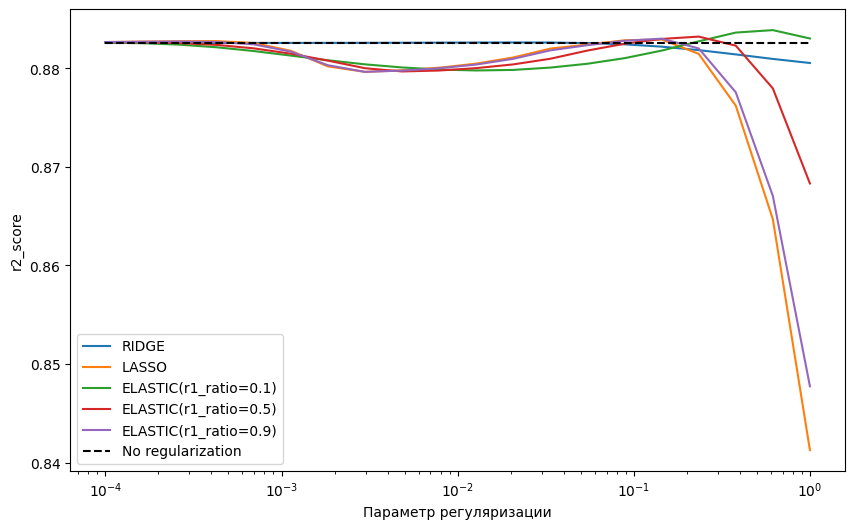

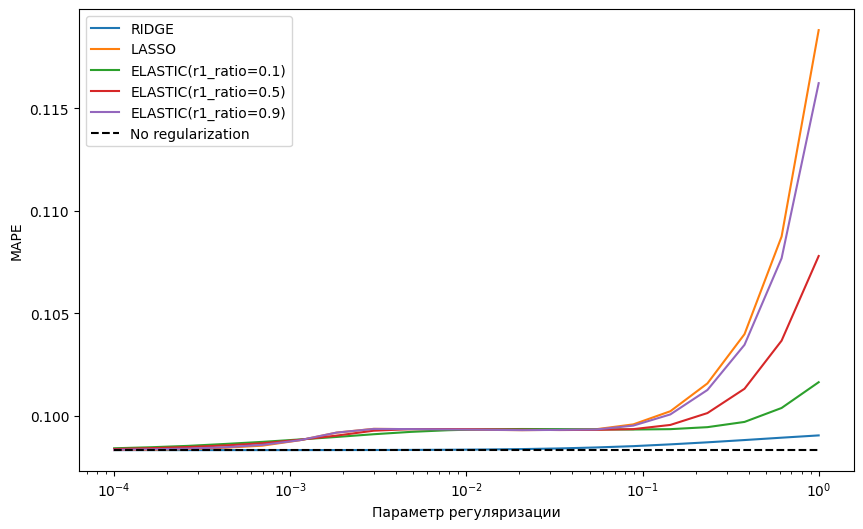

In [24]:
alphas = np.logspace(-4, 0, 20)

draw_errors(r2_score, "r2_score", alphas, X_train, y_train, X_test, y_test)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas, X_train, y_train, X_test, y_test)

Сравните все модели, поясняя полученные результаты и значения метрик.

**Вывод:**  Запишем результаты на новых параметрах. У первых 4 одинаковые r2 = 0.88, MAPE = 10%.
1) Линейная регрессия: мастхев когда нет мультиколлинеарности
2) Ridge: Она помогает сглаживать скачки, в данной работе не особо актуальна
3) Lasso: Она хороша в тех случаях, когда нужно выбрать конкретные параметры, которые наилучшим образом связаны с таргетом
4) Elastic net: золотая середина между lasso и ridge. вместо lasso в этой работе мы могли бы использовать и ее.

5) NN с одним линейным слоем: r2 = 0.83, MAPE = 11%. Результаты похожи на обычную линейную модель, собственно - это и есть простейший тип, который мы использовали. Ее преимущество в том, что не нужно искать подходящие параметры регуляризации, а недостаток - на обучение может уйти большое колличество шагов.


---
### Задача 2
#### *Профиль физика*

Скачайте [датасет](https://drive.google.com/file/d/1QqYK7Go96vR4l66MShlUuXxY0_FaBcYB/view?usp=sharing), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)


In [25]:
data = pd.read_csv('Z_boson.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Z_boson.csv'

Удалите столбцы `Unnamed: 0`, `Run` и `Event`, так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец `class`) к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.


In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=2.0)
sns.pairplot(data, hue="class", palette="deep")

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [ ]:
# исходя из графиков, отберём признаки для обучения
selected_features = [<...>]
X = data[selected_features]

In [ ]:
# таргет преобразуем из строк "Zee", "Zmumu" к 0 и 1
<...>

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

**Переходите к общей части.**

### Профиль биология

Скачайте [датасет](https://miptstats.github.io/courses/ad_mipt.html), описывающий влияние курения и алкоголя на человека. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

In [ ]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

In [ ]:
df.describe()

In [ ]:
df.columns, df.shape

In [ ]:
column_names = df.columns[1:-2]# нам не нужны гендер и таргеты сейчас

In [ ]:
column_names

Попробуем классифицировать людей с плохими привычками и без них, чтобы облегчить нам задачу. Для этого создадим дополнительный столбец в таблице, который будет содержать информацию о том, имеет ли человек вредные привычки или нет.

In [ ]:
def smoking_preprocessing(x):
  if x == 3 or x == 2:
    return 1
  else:
    return 0

def drinking_preprocessing(x):
  if x == 'Y':
    return 1
  else:
    return 0

In [ ]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].apply(func = smoking_preprocessing)
df['DRK_YN'] = df['DRK_YN'].apply(func = drinking_preprocessing)

In [ ]:
df['bad_habits'] = df['DRK_YN']+df['SMK_stat_type_cd']-df['DRK_YN']*df['SMK_stat_type_cd']

Теперь смотрим на разделение по привычкам

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[:7])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[7:15])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[15:])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
target_1 = df.pop('SMK_stat_type_cd')
target_2 = df.pop('DRK_YN')
target_3 = df.pop('bad_habits')

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [ ]:
# исходя из графиков, отберём признаки для обучения (нас интересуют вредные привычки)
selected_features = [<...>]
X = data[selected_features]

In [ ]:
# данных очень много, поэтому для экономии времени автор ноутбука отводит на обучение всего треть датасета
X_train, X_test, y_train, y_test = train_test_split(X, target_3, train_size=0.3)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

## Общая часть

Как вы помните, в задаче классификации предсказывается вероятность. На основании этой вероятности можно делать вывод о принадлежности объекта к тому или иному классу. Причём не всегда используется порог $P=0.5$. Например, если классы несбалансированы, это значение можно варьировать на интервале (0, 1). Предоставляем вам возможность самим выбрать этот порог и поэкспериментировать.

In [ ]:
class_lim_proba = <...> # критерий принадлежности к тому или иному классу

Стандартизируйте данные

Напишем функцию для отрисовки кривых обучения. На одном графике расположим значение функции потерь на трейне и валидации, а на другом &mdash; значение метрики качества на ваш выбор, также для трейна и валидации.

In [ ]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    clear_output(wait=True)

    fig = plt.figure(figsize=(20, 7))
    fontsize = 15   # размер шрифта

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=fontsize)
    plt.plot(history['loss_train'], label='train')
    plt.plot(history['loss_val'],   label='val')
    plt.ylabel('лосс',  fontsize=fontsize)
    plt.xlabel('эпоха', fontsize=fontsize)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Метрика', fontsize=fontsize)
    plt.plot(history['metric_train'], label='train')
    plt.plot(history['metric_val'],   label='val')
    plt.ylabel('Значение метрики', fontsize=fontsize)
    plt.xlabel('эпоха',    fontsize=fontsize)
    plt.legend()
    plt.show()

Напишите функцию метрики, которую вы будете использовать, например accuracy.

In [ ]:
def metric(y_true, y_pred):
  <...>
  return metric

#### Создание модели.
В семинаре вы у промежуточных слоёв задавали `in_features = out_features = 1`, а в данном случае вам надо будет создать нейросеть из нескольких слоёв, поставив только у последнего из них `out_features = 1`.

Какой должна быть размерность входа первого слоя?

In [ ]:
model = <...>

model

#### Обучение

В качетсве функции потерь возьмите [бинарную кросс-энтропию](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), а шаг градиентного спуска установите равным 0.5. Можете взять и другие loss и `lr`, если хотите поэкспериментировать.

In [ ]:
optim_func = <...>
optimizer = <...>

In [ ]:
batch_size = 2000 # этот
num_iter = 200    # и этот параметры можете также поварьировать
history = {
    'loss_train': [],
    'loss_val': [],
    'metric_train': [],
    'metric_val': [],
}

for i in range(num_iter):
    
    # Так как размер выборки слишком велик, то будем обучать лишь на части данных
    indexes_train = np.random.choice(np.arange(len(X_train)), batch_size, replace=False)
    local_X_train = X_train[indexes_train]
    local_y_train = y_train[indexes_train]

    indexes_val = np.random.choice(np.arange(len(X_val)), batch_size//10, replace=False)
    local_X_val = <...>
    local_y_val = <...>

    # Forward pass: предсказание модели по данным X_train
    y_pred_train = <...>
    with torch.no_grad():
        y_pred_val = <...>


    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss_train = <...>
    with torch.no_grad():
        loss_val = <...>

    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    <...>

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    <...>

    # Зануление градиентов
    <...>

    # Считаем метрику на эпохе (здесь посчитана acuracy, можете реализовать любую другую за доп. баллы)
    metric_train = np.sum((y_pred_train.detach().numpy() >= class_lim_proba).reshape(-1) == local_y_train) / len(local_y_train)
    metric_val = np.sum((y_pred_val.detach().numpy() >= class_lim_proba).reshape(-1) == local_y_val) / len(local_y_val)

    # Сохраняем результаты эпохи
    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val)
    history['metric_train'].append(metric_train)
    history['metric_val'].append(metric_val)

    # График Метрики + Лосса для трейна и валидации каждую итерацию
    plot_learning_curves(history)

Тестирование

In [ ]:
with torch.no_grad():
      y_pred_test = <...>
      loss_test = <...>
      metric_test = <считается по аналогии с тем, как на обучении>
print(f" Test Loss: {loss_test} \n Test metric: {metric_test}")

**Выводы:**

---
## <b><font color="orange">Сложная часть</font></b>
### Задача 3

В этой задаче мы будем вручную реализовывать усложнение для линейной регрессии, которое вы рассматривали на семинаре. 

Запрещено использовать torch.nn (саму библиотеку torch использовать можно и нужно). Чтобы иметь перед глазами оставим здесь формулы:

$$\widehat{y}(x) = w_1u(x) + b_1,$$

$$u(x) = \sigma(w_0x + b_0),$$

$$\sigma(x) = \text{ReLU}(x) = \begin{equation*}\begin{cases}x, \; x \ge 0, \\ 0, \; \text{иначе,} \end{cases} \end{equation*}$$

$w_0, b_0 \in \mathbb{R}$ &mdash; обучаемые параметры первого слоя, $w_1, b_1 \in \mathbb{R}$ &mdash; обучаемые параметры второго слоя, $\sigma(x)$ &mdash; функция активации, в данном случае мы выбрали `ReLU`.

Реализуйте функцию активации:

In [ ]:
def act_func(x):
    return <...>

Задайте оптимизируемую функцию / функцию ошибки / лосс — [MSE](https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества):

$$
    MSE(\widehat{y}, y) = \frac{1}{n}\sum_{i=1}^n\left(\widehat y_i - y_i\right)^2
$$

In [ ]:
def optim_func(y_pred, y_true):
    return <...>

Обучите вашу модель на датасете с семинарского задания. Сравните полученный результат с результатом семинара.

In [ ]:
# Инициализация параметров
w0 = <...>
b0 = <...>
w1 = <...>
b1 = <...>

# Количество итераций
num_iter = 1000

# Скорость обучения для параметров
lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):

    # Forward pass: предсказание модели
    y_pred = <...>

    # Вычисление оптимизируемой функции (MSE)
    loss = <...>
    # Bakcward pass: вычисление градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    <...>

    # Зануление градиентов
    <...>

**Вывод:**

---
### Задача 4

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронку можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$





**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.


**2.1.** Начнем с производной MSE по выходам сети:
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя:

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$:

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам:

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**

...